#### ML02: Introduction to Regression

**Introduction**

In the previous chapter, we looked at a simple **classification** ML project. In this chapter we're going to look at a **regression** ML task. You'll remember from the introductory section that we can use **regression** to predict a continuous numeric value. Let's start by importing our go-to data libraries:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We're going to be looking at another scikit learn dataset of house prices in Boston from the 1970's and we're going to see if we can predict the house price value based upon other variables in the dataset. We can load and deal with this in the same way we dealt with the iris dataset:

In [26]:
from sklearn import datasets
boston = datasets.load_boston()

df = pd.DataFrame(
    data=boston.data,
    columns=boston.feature_names
)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

Unfortunatley the variable names don't make a great deal of sense. Their descriptions are as follows:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - Percentage lower status of the population

We can see that the B variable contains a racial profiling element, and this would be completely unethicaql to use, so we'll drop this from the dataset. This is another worthwhile lesson around investigating your data!  
It's also good practice to convert the column names to more meaningful names, that are lower case without spaces.

In [27]:
df.drop('B', axis=1, inplace=True)
df.columns = ['crime_rate', 'residential_land', 'industrial_land', 'river', 'nox', 'av_rooms', 'age', 'distance', 'highways', 'tax_rate', 'teachers', 'lower']
df.head(5)

crime_rate  residential_land  industrial_land  river    nox  av_rooms  \
0     0.00632              18.0             2.31    0.0  0.538     6.575   
1     0.02731               0.0             7.07    0.0  0.469     6.421   
2     0.02729               0.0             7.07    0.0  0.469     7.185   
3     0.03237               0.0             2.18    0.0  0.458     6.998   
4     0.06905               0.0             2.18    0.0  0.458     7.147   

    age  distance  highways  tax_rate  teachers  lower  
0  65.2    4.0900       1.0     296.0      15.3   4.98  
1  78.9    4.9671       2.0     242.0      17.8   9.14  
2  61.1    4.9671       2.0     242.0      17.8   4.03  
3  45.8    6.0622       3.0     222.0      18.7   2.94  
4  54.2    6.0622       3.0     222.0      18.7   5.33

Also we don't have a **target** variable in the dataset. We can append this as follows:

In [28]:
df['price'] = boston.target * 1000

**Exploratory Analysis**

Now we have our finished dataset, we'll start by doing some exploratory analysis. There are a few quick and simple things we can do to get some more information on the dataset, so we'll start by exploring those.

**df.info()**  

The first, and quickest is the `df.info()` method which brings back the columns, number of records and data types. As mentioned, this is quick, but pretty basic!

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crime_rate          506 non-null float64
residential_land    506 non-null float64
industrial_land     506 non-null float64
river               506 non-null float64
nox                 506 non-null float64
av_rooms            506 non-null float64
age                 506 non-null float64
distance            506 non-null float64
highways            506 non-null float64
tax_rate            506 non-null float64
teachers            506 non-null float64
lower               506 non-null float64
price               506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


**df.corr()**

Pandas can also produce a correlation matrix, showing us the level of correlation between the variables, with 1 being a perfect postive correlation and 0 being a perfect negative correlation:

In [30]:
df_corr = df.corr()
df_corr.round(1)

crime_rate  residential_land  industrial_land  river  nox  \
crime_rate               1.0              -0.2              0.4   -0.1  0.4   
residential_land        -0.2               1.0             -0.5   -0.0 -0.5   
industrial_land          0.4              -0.5              1.0    0.1  0.8   
river                   -0.1              -0.0              0.1    1.0  0.1   
nox                      0.4              -0.5              0.8    0.1  1.0   
av_rooms                -0.2               0.3             -0.4    0.1 -0.3   
age                      0.4              -0.6              0.6    0.1  0.7   
distance                -0.4               0.7             -0.7   -0.1 -0.8   
highways                 0.6              -0.3              0.6   -0.0  0.6   
tax_rate                 0.6              -0.3              0.7   -0.0  0.7   
teachers                 0.3              -0.4              0.4   -0.1  0.2   
lower                    0.5              -0.4              0.6   -0.1  0.6   
price                   -0.4               0.4             -0.5    0.2 -0.4   

                  av_rooms  age  distance  highways  tax_rate  teachers  \
crime_rate            -0.2  0.4      -0.4       0.6       0.6       0.3   
residential_land       0.3 -0.6       0.7      -0.3      -0.3      -0.4   
industrial_land       -0.4  0.6      -0.7       0.6       0.7       0.4   
river                  0.1  0.1      -0.1      -0.0      -0.0      -0.1   
nox                   -0.3  0.7      -0.8       0.6       0.7       0.2   
av_rooms               1.0 -0.2       0.2      -0.2      -0.3      -0.4   
age                   -0.2  1.0      -0.7       0.5       0.5       0.3   
distance               0.2 -0.7       1.0      -0.5      -0.5      -0.2   
highways              -0.2  0.5      -0.5       1.0       0.9       0.5   
tax_rate              -0.3  0.5      -0.5       0.9       1.0       0.5   
teachers              -0.4  0.3      -0.2       0.5       0.5       1.0   
lower                 -0.6  0.6      -0.5       0.5       0.5       0.4   
price                  0.7 -0.4       0.2      -0.4      -0.5      -0.5   

                  lower  price  
crime_rate          0.5   -0.4  
residential_land   -0.4    0.4  
industrial_land     0.6   -0.5  
river              -0.1    0.2  
nox                 0.6   -0.4  
av_rooms           -0.6    0.7  
age                 0.6   -0.4  
distance           -0.5    0.2  
highways            0.5   -0.4  
tax_rate            0.5   -0.5  
teachers            0.4   -0.5  
lower               1.0   -0.7  
price              -0.7    1.0

**df.hist()**

The `df.hist()` method which creates histograms for each of the variables in the dataset:

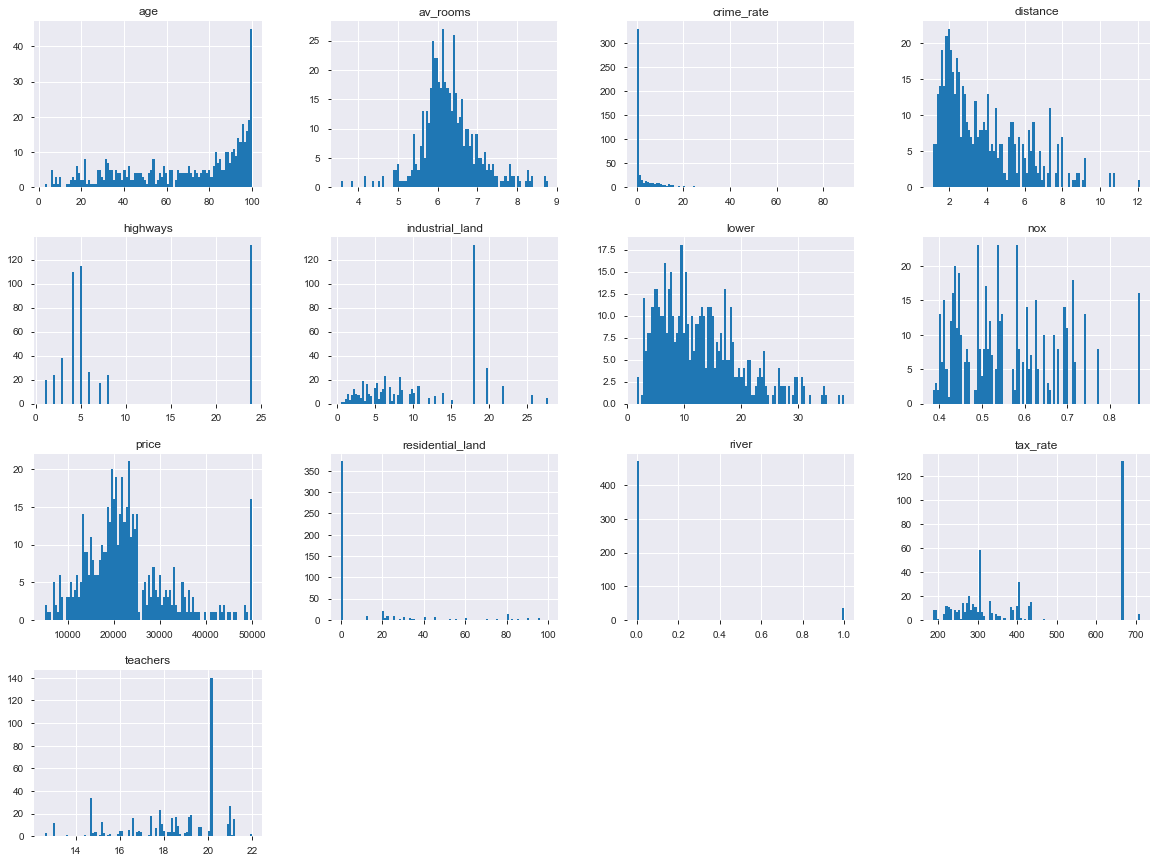

In [31]:
df.hist(bins=100, figsize=(20,15))
plt.show()

**Pandas Profiling**

We can also use a python package called Pandas Profiling to build us a report of the dataset. We'll need to install this via pip, but as an added twist we're going to do this from [inside our Jupyter Notebook](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)!

In [ ]:
import sys
!{sys.executable} -m pip install pandas_profiling

In [33]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

Using `ProfileReport()` is my personal favourite as it combines basic statistics, correlation, cardinality, checks for missing values as well as distributions in one command. You'll also see that it produces some warnings about the dataset which is pretty cool also! Additionally if you click **Toggle Details**, you'll get access to more options about that particular variable, including more detailed statistics and more information about common / extreme values. It also looks really nice. The downside is that it's slow and on larger datasets it can take a while.

We can see here that the profile report has rejected our `tax_rate` variable because it is highly correlated with `highways`. However on the face of it it's difficult to see a reason why the property tax rate would be so closely linked to the index for accessibility for highways. After all, **correlation doesn't imply causality!** We can override this in the profile report as follows:

In [34]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, correlation_overrides=['tax_rate'])
profile

**sns.pairplot()**

The last tool, which we met in the previous chapter, is the seaborn pairplot which plots all the variables against one another. This dataset has a fair few variables in it, so we'll only use it with the variables with a higher correlation with our **target** which is the `price` variable. We'll also pass the `kind='reg'` keyword argument to plot a basic linear regression against the data.

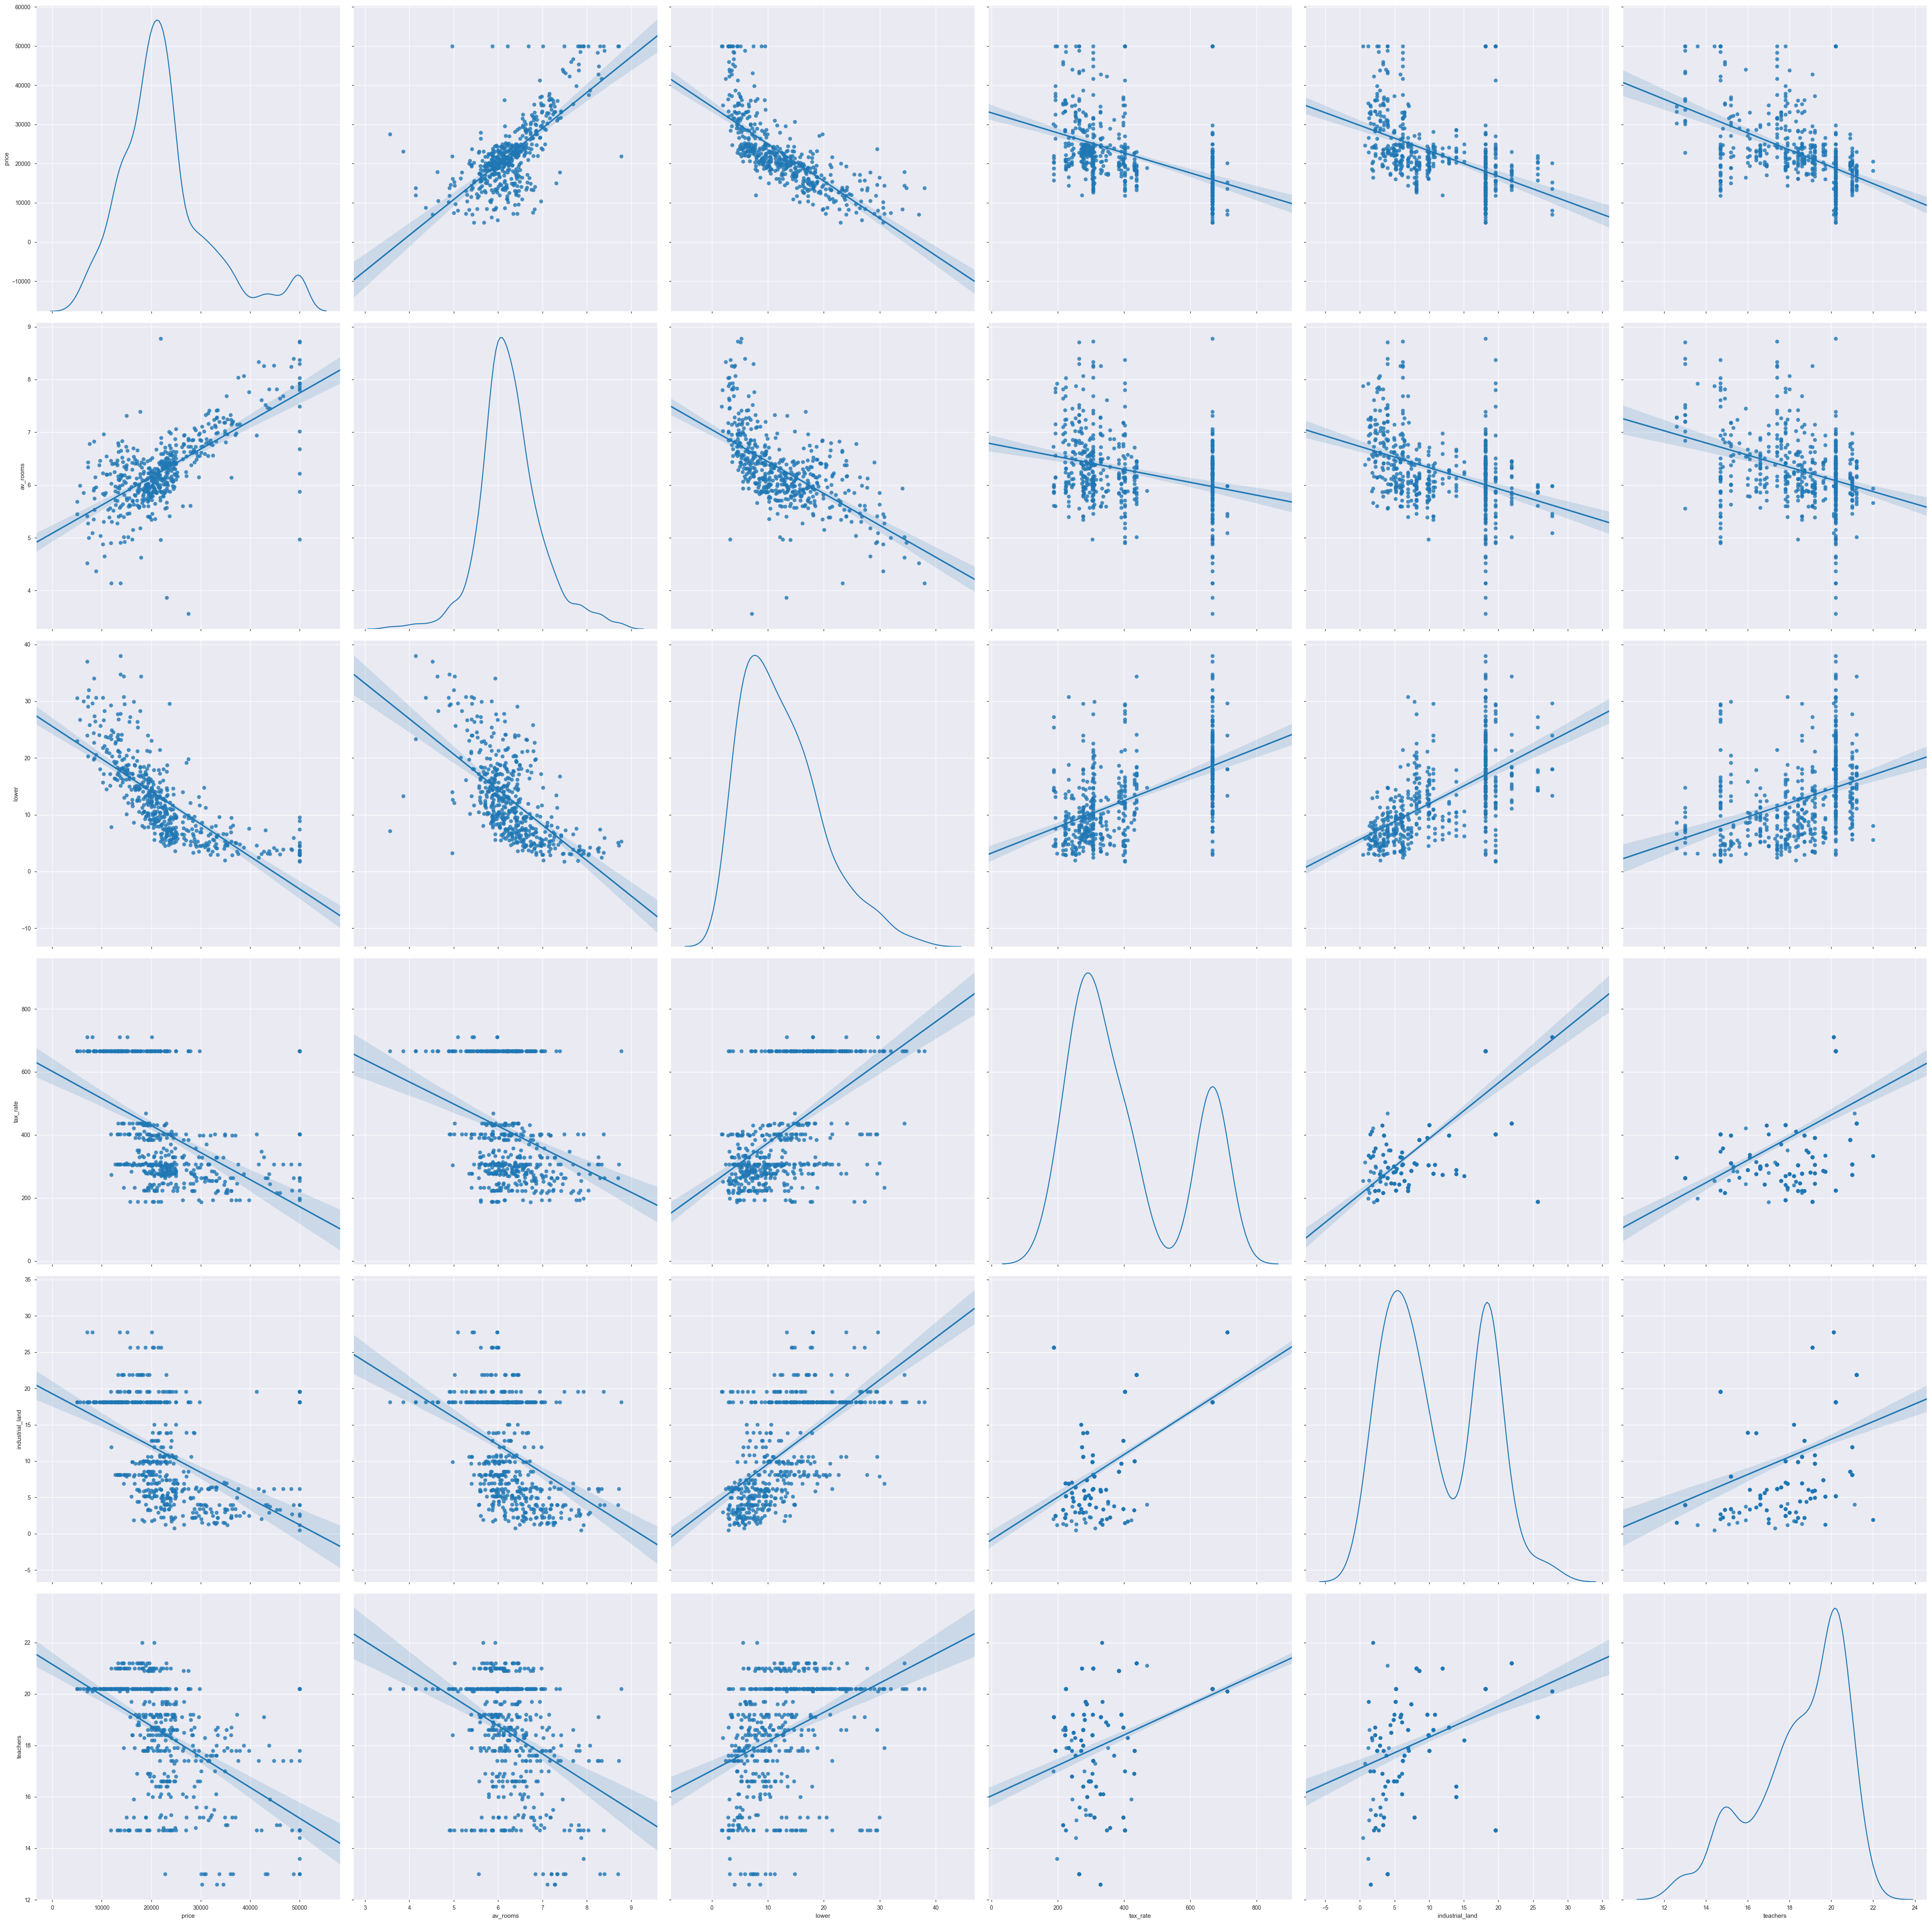

In [35]:
variables = ['price','av_rooms','lower','tax_rate','industrial_land','teachers']

pairplot1 = sns.pairplot(
    data=df[variables], 
    diag_kind='kde',
    kind="reg",
    size=8
)

As a result of our preparatory analysis we've revealed a few interesting things here as follows:

1. It looks as though the `price` variable is capped at 50, based upon the plots at the top line. When we look at the data, based upon the distribution, it does seem unlikley that you would have so may records with the exact same value. For now we'll leave these values as is, but we'll look at ways in which we can improve our data in the upcoming chapters using a process called **feature engineering**.
2. Pandas Profiling has given us a warning that `tax_rate` is highly correlated with `highways` and that we should ignore it. However on the face of it it's difficult to see a reason why the property tax rate would be so closely linked to the index for accessibility for highways. After all, **correlation doesn't imply causality!**
3. Additionally the `tax_rate` variable looks like it might be better suited to being a categorical, rather than numeric variable. If we wanted to use this variable for our machine learning algorithm we might want to convert it. Again this is another example of **feature engineering** which we'll explore later in the course.
4. Out of all the data items it looks as the `av_rooms` and `lower` variables correlate well with the `price` variable which is our **target**. We'll pick the `av_rooms` variable to start with and see how we get on.

To begin with, we'll split the data into train and test as we did before with our **classification** algorithm:

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['av_rooms']],
    df[['price']],
    test_size=0.2, 
    random_state=8
)

**Regression**

Before we build and fit our model, it's important that we know a little bit about **regression**. **Regression** is a statistical method that determines the strength of relationship between one **dependent variable** and one or more other **independent variables**. In ML terms the dependent variable is our **target** and the independent variables are our **features** or **predictors**. When we're exploring these concepts we'll be using the ML terminology wherever possible (e.g. **target** instead of **dependent variable**) to keep confusion to a minumum, but keep in mind that the statistical terms do differ from these.

There are many types of regression across the data science and statistical landscape and it can appear overwhelming at first, however boiled down to it's simplest level, **regression** is all about drawing lines through and around data. We'll be exploring some of types of **regression** used as ML algorithms throughout this course, but for now we'll start with one of the easiest to understand, **Linear Regression**.

**Linear Regression**

[Linear Regression](http://onlinestatbook.com/2/regression/intro.html) (also sometimes called **Simple Linear Regression**) is used to define a relationship to predict the (average) numerical value of a **target** variable for a given value of one or more **features** or **predictors** using a straight line (called the **regression line**). If you know the slope of the **regression line** and where that line intercepts the y-axis, then you can plug in a value for a **predictor** and predict the average value for the **target**.

![Linear Regression](../img/linear-regression.png)

You can find a full breakdown of how **linear regression** is calculated [here](http://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/).



Scikit-learn will of course handle the calculation of the line for us and we can build a model using pretty much the same syntax as our previous **classification** model. As mentioned previously we'll be going into more details of algorithms later on in the course, but for now, all you need to know is that **linear regression** will find the best fitting straight line through our data, similar to the seaborn pairplots above. We can then use that line to predict the value of our **target** (in this case `price`) variable, based upon the value of our **predictor** variable (in this case `av_rooms`). 

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()        # Initialising the model
model.fit(X_train, y_train)       # Fitting the model
y_predict = model.predict(X_test) # Making the prediction on the test data

**Root Mean Squared Error**  

Since this is a **regression** task, our **performance measure** will be slightly different from our previous **classification** algorithm, since our answer is not going to be a binary yes/no. Generally for **regression** tasks the [Root Mean Squared Error (RMSE)](https://www.quora.com/What-is-the-meaning-of-root-mean-squared-error-RMSE-in-statistics) is a good **performance measure**. **RMSE** measures the standard deviation of the errors (the difference between the actual data and our predicted value) in our model's predictions. For example, an RMSE equal to 10 means that about 68% of the system’s predictions fall within \$50,000 of the actual value, and about 95% of the predictions fall within 20 of the actual value.

The diagram below illustrates RMSE quite well: 

![RMSE](../img/rmse.jpg)

We can calculate the RMSE for our model as follows:

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_predict))
print('RMSE: {}'.format(int(rms)))

RMSE: 6310


This means that **68%** of our predicted values will fall within **6310** of the actual value and **95%** of our predictions will fall within **12620** of the actual value. This isn't that good ☹️, but we will explore ways in which we can improve this using concepts such as **Feature Engineering** and **Multiple Regression** in the upcoming chapters.

**Explained Variance**  

Another **performance measure** we can use is the **Explained Variance Score (EVS)**.

In [42]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, y_predict)
print('EVS: {}'.format(round(evs,2)))

EVS: 0.47


You can find a full list of all the **performance measures** available in scikit-learn [here](http://scikit-learn.org/stable/modules/model_evaluation.html).

**Visualising our Model**   

We can once again use matplotlib to visualise our **regression model**:

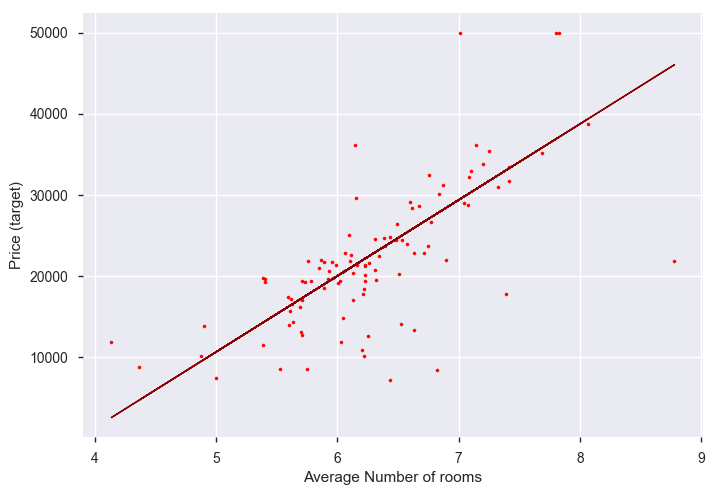

In [43]:
# Plot outputs
plt.scatter(X_test, y_test,  color='red', s=5)
plt.plot(X_test, y_predict, color='darkred', linewidth=1)
plt.xlabel('Average Number of rooms')
plt.ylabel('Price (target)')
plt.show()

Visualising our model is important, especially if you're not good at maths! As we've determined from our **performance measure** our linear model isn't performing particularly well. There are a few solutions which we can explore here as follows:

**1. More / Better / Different Data** 
So far we've only tried a **regression** with our `av_rooms` variable. We could also try the `lower` variable as this too was quite well correlated with out **target** `price` variable. Additionally we might to include two or more **predictor** variables such as `av_rooms` and `lower` since these display a high correlation with our **target** `price` variable. Using two or more predictors in this fashion involves a technique called **Multiple Regression** which we can explore in the upcoming chapters.

**2. Fine-Tuning our Algorithm**  
So far we've not made any attempt to customise our model. Scikit learn gives us numerous options to fine-tune our model through **Hyperparameters**. Simply put these are parameters input into the model before the training process begins to control things like the mathmatical functions of the model, the rate at which it learns etc. Again, we'll explore the process of **Hyperparameter Tuning** in the upcoming chapters.  

**3. More Suitable Algorithms Algorithm**  
We can see here that our data is quite variable and that a striaght line **linear regression** model may not necessarily be the best solution to this problem. We might want to consider trying different algorithms such as **ridge regression**, **lasso regression** or **Support Vector Machines (SVM)**. We'll be going to more detail of individual models later on in the course.

**4. Feature Engineering**
Lastly, we can also explore possibilities for transforming our data to make it more suited or receptive to ML algorithms. This is a broad and informal process called **Feature Engineering** and can encompass tasks such as cleaning the data (removing errors, outliers, missing values, poor features etc.), transforming the data (creating categorical variables, averaging, weighting etc.), standardizing the data (transforming the scales of the data) and many many more.

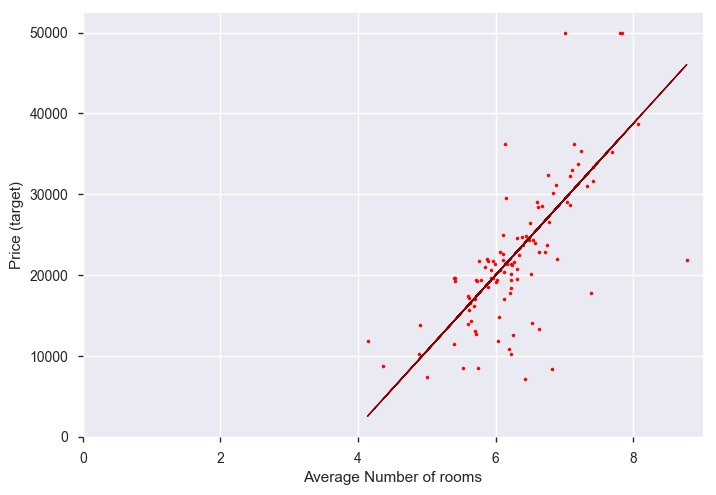

In [44]:
# Plot outputs
plt.scatter(X_test, y_test,  color='red', s=5)
plt.plot(X_test, y_predict, color='darkred', linewidth=1)
# Labels
plt.xlabel('Average Number of rooms')
plt.ylabel('Price (target)')
plt.ylim(0)
plt.xlim(0)
plt.show()

#### Sources & Further Reading

[Types of Linear Regression](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)  
[Intro to Regression](http://onlinestatbook.com/2/regression/intro.html)  
[Linear Regression](https://www.dummies.com/education/math/statistics/using-linear-regression-to-predict-an-outcome/)   
[Regression Performance Measures](http://www.enlistq.com/top-5-metrics-evaluating-regression-models/)  
[Interpreting Model Coefficients](https://www.theanalysisfactor.com/interpreting-regression-coefficients/)  
[Matplotlib Scatter API reference](https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py)  
[Hyperparameters](https://www.quora.com/What-are-hyperparameters-in-machine-learning)   